# Analysing US Gun deaths

## Questions:
Here are some potential questions we want to answer:
1-Figure out the link, if any, between month and homicide rate.
2-Explore the homicide rate by gender.
3-Explore the rates of other intents, like Accidental, by gender and race.
4-Find out if gun death rates correlate to location and education.

### Introduction to dataset:
There are ten rows in the dataset as shown below:
1-year:year of death (2012-2014)
2-month:month of death(1-12)
3-intent:Reason behind the death(Suicide, Accidental, NA, Homicide, or Undetermined)
4-police:whether a police officer was involved or not(0 or 1)
5-Sex:Gender of the victim(M or F)
6-age:age of the victim
7-race:race of the victim(Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White)
8-hispanic:a code indicating hispanic origin of victim
9-place:place where the shooting occured
10-education:education of the victim

In [116]:
import pandas as pd
data=pd.read_csv("full_data.csv",index_col=0)
data.tail(5)

,year,month,intent,police,sex,age,race,hispanic,place,education
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED
100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,Less than HS
100798,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,HS/GED


Finding number of deaths each year

In [117]:
def year_deaths(data):
    year_counts={}
    for idx,row in data.iterrows():
        if row["year"] in year_counts:
            year_counts[row["year"]]+=1
        else:
            year_counts[row["year"]]=1
    return year_counts
print(year_deaths(data))

{2012: 33563, 2013: 33636, 2014: 33599}


Exploring Number of deaths each month

In [118]:
def month_deaths(data):
    month_counts={}
    for idx,row in data.iterrows():
        if row["month"] in month_counts:
            month_counts[row["month"]]+=1
        else:
            month_counts[row["month"]]=1
    return month_counts
print(month_deaths(data))

{1: 8273, 2: 7093, 3: 8289, 4: 8455, 5: 8669, 6: 8677, 7: 8989, 8: 8783, 9: 8508, 10: 8406, 11: 8243, 12: 8413}


Finding number of deaths each sex suffered

In [119]:
def sex_deaths(data):
    death_counts={}
    for idx,row in data.iterrows():
        if row["sex"] in death_counts:
            death_counts[row["sex"]]+=1
        else:
            death_counts[row["sex"]]=1
    return death_counts
print(sex_deaths(data))

{'M': 86349, 'F': 14449}


Finding number of deaths per race

In [120]:
def race_deaths(data):
    race_counts={}
    for idx,row in data.iterrows():
        if row["race"] in race_counts:
            race_counts[row["race"]]+=1
        else:
            race_counts[row["race"]]=1
    return race_counts
r_deaths=race_deaths(data)

Death rate(percentage) of each race:
For this, we will be using a new file(census.csv) that contains total population of each race.

In [121]:
tot_pop=pd.read_csv("census.csv")
tot_pop.head()

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


Extracting population of each race into a dictionery.

In [122]:
mapping={}
mapping['Asian/Pacific Islander']=int(tot_pop["Race Alone - Asian"]+tot_pop["Race Alone - Native Hawaiian and Other Pacific Islander"])
mapping['Black']=int(tot_pop["Race Alone - Black or African American"])
mapping['Native American/Native Alaskan']=int(tot_pop["Race Alone - American Indian and Alaska Native"])
mapping['Hispanic']=int(tot_pop["Race Alone - Hispanic"])
mapping['White']=int(tot_pop["Race Alone - White"])
race_per_hundredk={}
for key in r_deaths:
    race_per_hundredk[key]=(r_deaths[key]/mapping[key])*100000
print(race_per_hundredk)

{'Asian/Pacific Islander': 8.374309664161762, 'White': 33.56849303419181, 'Native American/Native Alaskan': 24.521955573811088, 'Black': 57.8773477735196, 'Hispanic': 20.220491210910907}


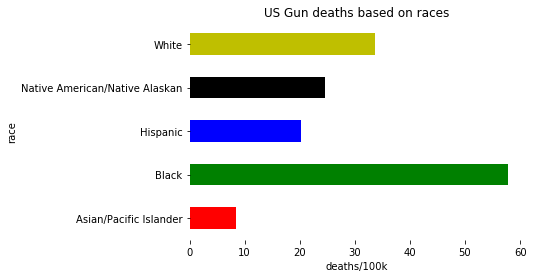

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
deaths=pd.Series(race_per_hundredk)
h=deaths.plot(kind='barh',linewidth=2,color='rgbky')
h.set_ylabel("race")
h.set_xlabel("deaths/100k")
h.set_title("US Gun deaths based on races")
h.tick_params(top="off",right="off")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)
h.spines['bottom'].set_visible(False)
h.spines['left'].set_visible(False)

Graph illustrates that the death rate of black americans is the greatest showing huge racial prejudice in USA.

Figuring out the link between month and homicide rate

In [124]:
def month_deaths_homicide(data):
    d_counts={}
    for idx,row in data.iterrows():
        if row["intent"]=="Homicide":
            if row["month"] in d_counts:
                d_counts[row["month"]]+=1
            else:
                d_counts[row["month"]]=1
    return d_counts
month_hom=month_deaths_homicide(data)

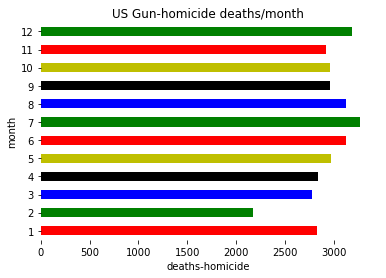

In [125]:
deaths=pd.Series(month_hom)
h=deaths.plot(kind='barh',linewidth=2,color='rgbky')
h.set_ylabel("month")
h.set_xlabel("deaths-homicide")
h.set_title("US Gun-homicide deaths/month")
h.tick_params(top="off",right="off")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)
h.spines['bottom'].set_visible(False)
h.spines['left'].set_visible(False)

# Findings:
Homicide deaths are greatest in July and December.

Homicide rate by gender:

In [126]:
def homicide_gender(data):
    d_counts={}
    for idx,row in data.iterrows():
        if row["intent"]=="Homicide":
            if row["sex"] in d_counts:
                d_counts[row["sex"]]+=1
            else:
                d_counts[row["sex"]]=1
    return d_counts
gender_homicide=homicide_gender(data)
print(gender_homicide)

{'M': 29803, 'F': 5373}


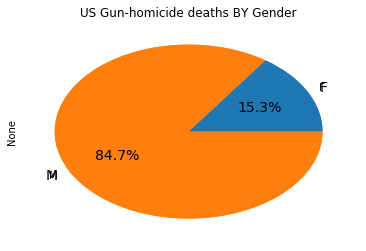

In [127]:
deaths=pd.Series(gender_homicide)
h=deaths.plot(kind='pie')
h=deaths.plot(kind='pie',autopct='%1.1f%%',fontsize=14)
h.set_title("US Gun-homicide deaths BY Gender")


# Findings:
It is very obvious that homicide rate in the US is higher in Males(84.7%) and lower in females(15.3%)

Suicide rate by Gender:

In [128]:
def suicide_gender(data):
    d_counts={}
    for idx,row in data.iterrows():
        if row["intent"]=="Suicide":
            if row["sex"] in d_counts:
                d_counts[row["sex"]]+=1
            else:
                d_counts[row["sex"]]=1
    return d_counts
gender_suicide=suicide_gender(data)
print(gender_suicide)

{'M': 54486, 'F': 8689}


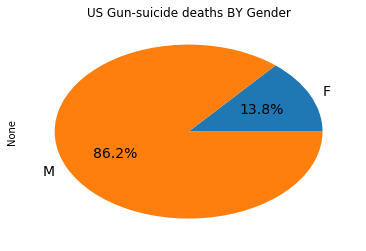

In [129]:
deaths=pd.Series(gender_suicide)
h=deaths.plot(kind='pie',autopct='%1.1f%%',fontsize=14)
h.set_title("US Gun-suicide deaths BY Gender")


# Findings:
Suicide rate is also greater among Males.

In [130]:
def race_deaths_suicide(data):
    d_counts={}
    for idx,row in data.iterrows():
        if row["intent"]=="Suicide":
            if row["race"] in d_counts:
                d_counts[row["race"]]+=1
            else:
                d_counts[row["race"]]=1
    rate={}
    for key in d_counts:
        rate[key]=(d_counts[key]/mapping[key])*100000
    return rate
r_d_s=race_deaths_suicide(data)

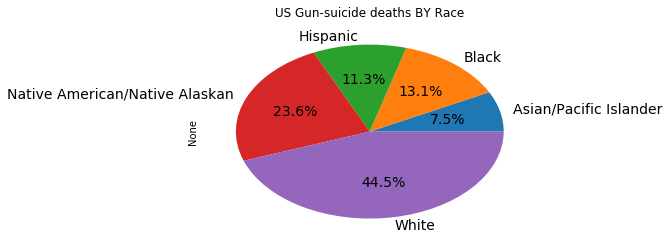

In [131]:
deaths=pd.Series(r_d_s)
h=deaths.plot(kind='pie',autopct='%1.1f%%',fontsize=14)
h.set_title("US Gun-suicide deaths BY Race")

    

# Findings;
Surprisingly,although gun-death rate is higher in black race but suicide rate is greatest in white Americans.

In [132]:
education=[row["education"] for idx,row in data.iterrows()]
edu_deaths={}
for q in education:
    if pd.notnull(q):
        if q in edu_deaths:
            edu_deaths[q]+=1
        else:
            edu_deaths[q]=1
print(edu_deaths)

{'BA+': 12946, 'Some college': 21680, 'HS/GED': 42927, 'Less than HS': 21823}


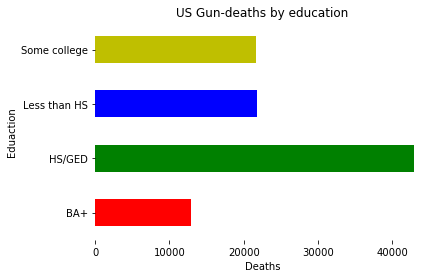

In [133]:
deaths=pd.Series(edu_deaths)
h=deaths.plot(kind='barh',linewidth=2,color='rgby')
h.set_ylabel("Eduaction")
h.set_xlabel("Deaths")
h.set_title("US Gun-deaths by education")
h.tick_params(top="off",right="off")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)
h.spines['bottom'].set_visible(False)
h.spines['left'].set_visible(False)

In [134]:
Place=[row["place"] for idx,row in data.iterrows()]
place_deaths={}
for q in Place:
    if pd.notnull(q):
        if q in place_deaths:
            place_deaths[q]+=1
        else:
            place_deaths[q]=1
print(place_deaths)

{'Home': 60486, 'Street': 11151, 'Other specified': 13751, 'Other unspecified': 8867, 'Trade/service area': 3439, 'Farm': 470, 'Industrial/construction': 248, 'School/instiution': 671, 'Sports': 128, 'Residential institution': 203}


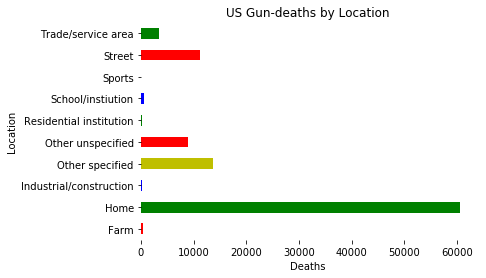

In [135]:
deaths=pd.Series(place_deaths)
h=deaths.plot(kind='barh',linewidth=2,color='rgby')
h.set_ylabel("Location")
h.set_xlabel("Deaths")
h.set_title("US Gun-deaths by Location")
h.tick_params(top="off",right="off")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)
h.spines['bottom'].set_visible(False)
h.spines['left'].set_visible(False)

# Findings:
#### 1-Number of gun deaths is the largest among the graduates:
#### 2-Number of gun deaths at home is the largest.